# Veri Standardizasyonu & Degişken Dönüşümü

### Standartlaştırma 

In [1]:
import numpy as np
import pandas as pd

V1=np.array([1,3,6,5,7])
V2=np.array([7,7,5,8,12])
V3=np.array([6,12,5,6,14])
df=pd.DataFrame(
{
    "V1":V1,
    "V2":V2,
    "V3":V3})

df=df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [2]:
from sklearn import preprocessing

In [3]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

## Normalizasyon

bir degişkenin degerlerini 0 ila 1 arasında dönüştürmek

In [5]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min-Max Dönüşümü

 bir degişkenin istedigimiz iki deger aralıgına dönüştürmek için kullanlır 

In [7]:
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))

In [8]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Binarize Dönüşümü

belirli bir eşik degere göre degişkenin degerlerini  0 1 dönüştürür

verinin standartlaşatırılması degil degişkenin dönüştürülmesidir 

In [16]:
binarizer=preprocessing.Binarizer(threshold=5).fit(df)
#eşik degeri biz burada 5 olarak girdik 

In [14]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

## 0-1 Dönüşümü

In [17]:
import seaborn as sns
tips=sns.load_dataset('tips')
df=tips.copy()
df_l=df.copy()

In [18]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
df_l["yeni_sex"]=df_l["sex"].cat.codes

In [20]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [21]:
lbe=preprocessing.LabelEncoder()

In [22]:
df_l["daha_yeni_sex"]=lbe.fit_transform(df_l["sex"])

In [24]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


## "1 ve Digerleri(0)" Dönüşümü

string şeklinde olanları 1 ve digerleri şeklinde bir dönüşüme tabi tuttu 

In [25]:
 df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [ ]:
df_l["yeni_gun"]=np.where(df_l["day"].str.contains("Sun"),1,0)

In [27]:
df_l.head(20)

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1


## Çok Sınıflı Dönüşüm

kategoroik degişkenin bagımlı degişkene olan etkileri bozulmaktadır ,bu nedenle one hot encodding yapılmalıdır 

bu dönüşümü yapmak istersek dikkat etmemiz gereken durumlar var diikat et

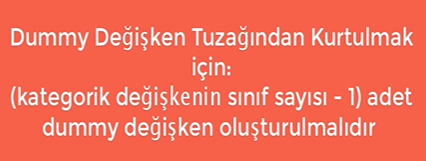

In [29]:
lbe=preprocessing.LabelEncoder()

In [30]:
df_l["daha_yeni_gun"]=lbe.fit_transform(df_l["day"])

In [31]:
df_l

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,2
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,1


## One-hot Dönüşümü ve Dummy Degişken Tuzagı

In [32]:
df_one_hot=df.copy()

In [33]:
pd.get_dummies(df_one_hot,columns=["sex"],prefix=["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [34]:
pd.get_dummies(df_one_hot,columns=["day"],prefix=["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


## Sürekli Degişkeni Kategorik Degişkene Çevirme

çok gerekmedikçe bunu kullanmayız

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
dff=df.select_dtypes(include=["float64","int64"])

In [42]:
est=preprocessing.KBinsDiscretizer(n_bins=[3,2,2],encode="ordinal",strategy="quantile").fit(dff)

In [43]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

## Degişkeni İndexe,İndexi Degişkene Çevirmek

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df["yeni_degisken"]=df.index

In [47]:
df["yeni_degisken"]=df["yeni_degisken"]+10

In [48]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


In [49]:
df.index=df["yeni_degisken"]

In [50]:
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='yeni_degisken', length=244)